**NAMA : SYAMS MUHAMMAD HARYANTO<br>
NIM : 211351144<br>
KELAS : PAGI B**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syamsmh","key":"1fb1e5c7922b80d76fceb5014bc92c29"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
! kaggle datasets download -d harishkumardatalab/housing-price-prediction

  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 12.9MB/s]


In [4]:
!mkdir housing-price-prediction
!unzip housing-price-prediction.zip -d housing-price-prediction
!ls housing-price-prediction

Archive:  housing-price-prediction.zip
  inflating: housing-price-prediction/Housing.csv  
Housing.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('housing-price-prediction/Housing.csv')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
pd.unique(df.mainroad)

array(['yes', 'no'], dtype=object)

In [11]:
pd.unique(df.guestroom)

array(['no', 'yes'], dtype=object)

In [12]:
pd.unique(df.basement)

array(['no', 'yes'], dtype=object)

In [13]:
pd.unique(df.hotwaterheating)

array(['no', 'yes'], dtype=object)

In [14]:
pd.unique(df.airconditioning)

array(['yes', 'no'], dtype=object)

In [15]:
pd.unique(df.prefarea)

array(['yes', 'no'], dtype=object)

In [16]:
pd.unique(df.furnishingstatus)

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [17]:
def change_string_to_int(column):
    variables=pd.unique(df[column])
    for item in range(variables.size):
        df[column]=[item if each==variables[item] else each for each in df[column]]
    return df[column]

In [18]:
df["mainroad"]=change_string_to_int("mainroad")

In [19]:
df["guestroom"]=change_string_to_int("guestroom")

In [20]:
df["basement"]=change_string_to_int("basement")

In [21]:
df["hotwaterheating"]=change_string_to_int("hotwaterheating")

In [22]:
df["airconditioning"]=change_string_to_int("airconditioning")

In [23]:
df["prefarea"]=change_string_to_int("prefarea")

In [24]:
df["furnishingstatus"]=change_string_to_int("furnishingstatus")

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0


<Axes: >

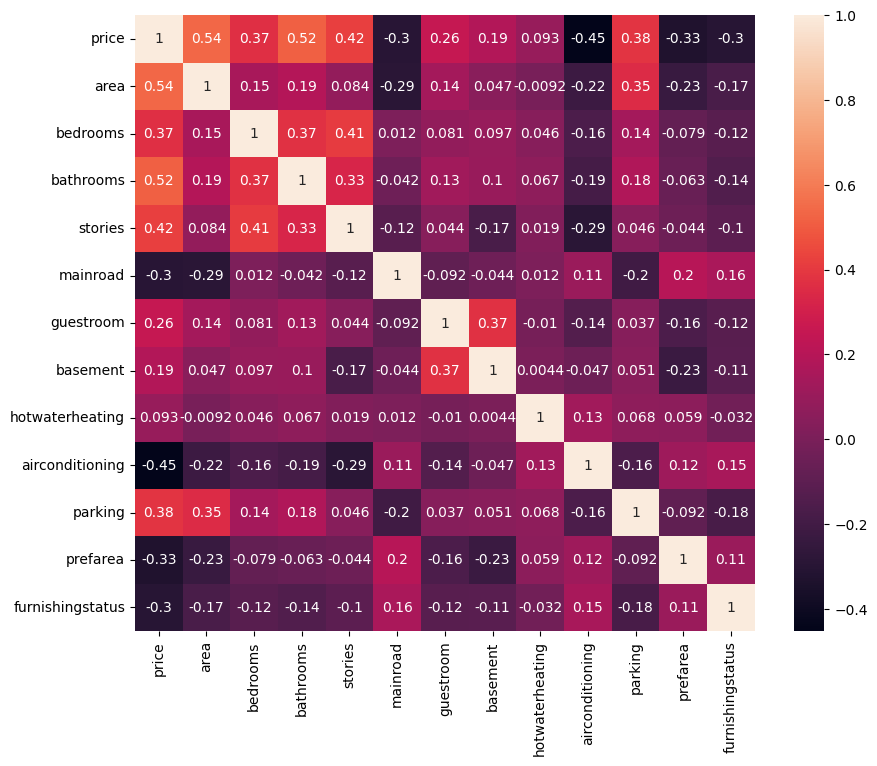

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

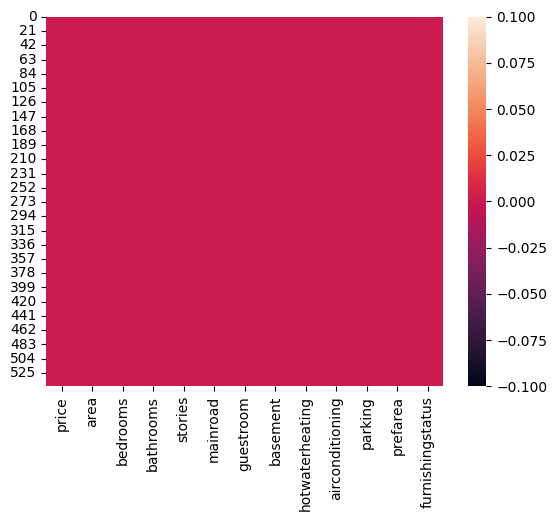

In [27]:
sns.heatmap(df.isnull())

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
features = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
x = df[features]
y = df['price']
x.shape, y.shape

((545, 12), (545,))

In [30]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=10)
y_test.shape

(137,)

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [32]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.7239338195221265


In [33]:
input_data = np.array([[7420,4,2,3,0,0,0,0,0,2,0,0]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah :', prediction)

Estimasi harga rumah : [8322602.33087379]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle

filename = 'prediksi_rumah.sav'
pickle.dump(lr,open(filename,'wb'))

In [36]:
from sklearn.metrics import precision_recall_curve, f1_score

threshold = 0.5

y_pred_binary = (pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary)

print('f1 Score :', f1)

f1 Score : 1.0
